In [2]:
!pip install scikit-fuzzy
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 16.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894077 sha256=06b9d16e179224cd98097abc7b93cae135243dceb8a9a2dbcff48321098263e6
  Stored in directory: /root/.cache/pip/wheels/4f/86/1b/dfd97134a2c8313e519bcebd95d3fedc7be7944db022094bc8
Successfully built scikit-fuzzy


Text(1.38, 0.5, 'High')

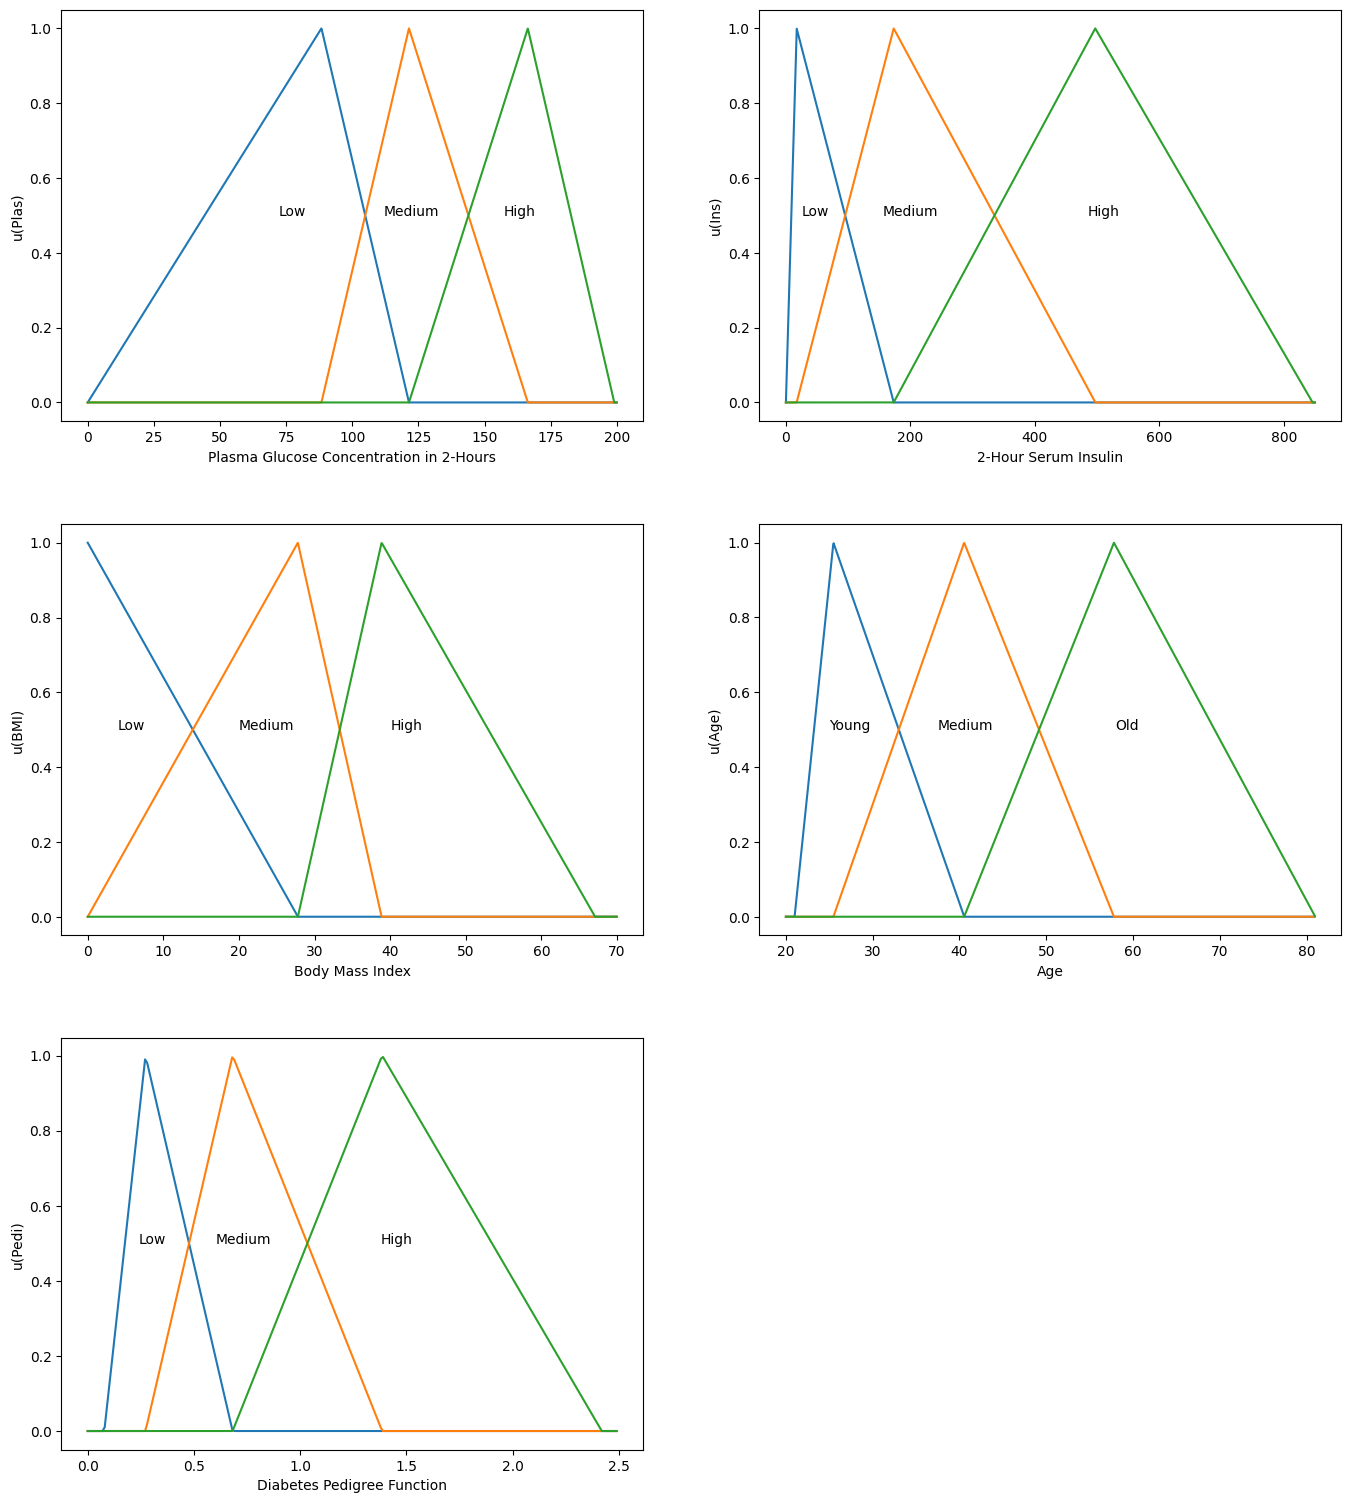

In [3]:
plt.subplots_adjust(left=1,bottom=2,right=3,top=5,wspace=0.2,hspace=0.25)

PLAS=np.arange(0,200,0.1)
plas_low=fuzz.trimf(PLAS,[0,88.335,121.408])
plas_med=fuzz.trimf(PLAS,[88.335,121.408,166.335])
plas_high=fuzz.trimf(PLAS,[121.408,166.335,199])
plt.subplot(3,2,1)
plt.xlabel("Plasma Glucose Concentration in 2-Hours")
plt.ylabel("u(Plas)")
plt.plot(PLAS,plas_low)
plt.plot(PLAS,plas_med)
plt.plot(PLAS,plas_high)
plt.text(72,0.5,"Low")
plt.text(112,0.5,"Medium")
plt.text(157,0.5,"High")

INS=np.arange(0,850,0.2)
ins_low=fuzz.trimf(INS,[0,17.276,173.175])
ins_med=fuzz.trimf(INS,[17.276,173.175,497])
ins_high=fuzz.trimf(INS,[173.175,497,846])
plt.subplot(3,2,2)
plt.xlabel("2-Hour Serum Insulin")
plt.ylabel("u(Ins)")
plt.plot(INS,ins_low)
plt.plot(INS,ins_med)
plt.plot(INS,ins_high)
plt.text(25,0.5,"Low")
plt.text(155,0.5,"Medium")
plt.text(485,0.5,"High")

MASS=np.arange(0,70,0.05)
mass_low=fuzz.trimf(MASS,[0,0,27.792])
mass_med=fuzz.trimf(MASS,[0,27.792,38.864])
mass_high=fuzz.trimf(MASS,[27.792,38.864,67.1])
plt.subplot(3,2,3)
plt.xlabel("Body Mass Index")
plt.ylabel("u(BMI)")
plt.plot(MASS,mass_low)
plt.plot(MASS,mass_med)
plt.plot(MASS,mass_high)
plt.text(4,0.5,"Low")
plt.text(20,0.5,"Medium")
plt.text(40,0.5,"High")

AGE=np.arange(20,81,0.05)
young=fuzz.trimf(AGE,[21,25.475,40.537])
medium=fuzz.trimf(AGE,[25.475,40.537,57.798])
old=fuzz.trimf(AGE,[40.537,57.798,81])
plt.subplot(3,2,4)
plt.xlabel("Age")
plt.ylabel("u(Age)")
plt.plot(AGE,young)
plt.plot(AGE,medium)
plt.plot(AGE,old)
plt.text(25,0.5,"Young")
plt.text(37.5,0.5,"Medium")
plt.text(58,0.5,"Old")

PEDI=np.arange(0,2.5,0.01)
pedi_low=fuzz.trimf(PEDI,[0.078,0.272,0.682])
pedi_med=fuzz.trimf(PEDI,[0.272,0.682,1.386])
pedi_high=fuzz.trimf(PEDI,[0.682,1.386,2.42])
plt.subplot(3,2,5)
plt.xlabel("Diabetes Pedigree Function")
plt.ylabel("u(Pedi)")
plt.plot(PEDI,pedi_low)
plt.plot(PEDI,pedi_med)
plt.plot(PEDI,pedi_high)
plt.text(0.24,0.5,"Low")
plt.text(0.6,0.5,"Medium")
plt.text(1.38,0.5,"High")

Text(0.71, 0.5, 'High')

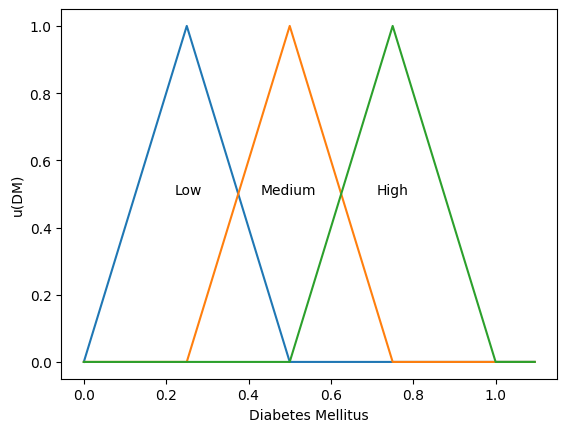

In [4]:
DIAB=np.arange(0,1.1,0.005)
dm_low=fuzz.trimf(DIAB,[0,0.25,0.5])
dm_med=fuzz.trimf(DIAB,[0.25,0.5,0.75])
dm_high=fuzz.trimf(DIAB,[0.5,0.75,1])
plt.xlabel("Diabetes Mellitus")
plt.ylabel("u(DM)")
plt.plot(DIAB,dm_low)
plt.plot(DIAB,dm_med)
plt.plot(DIAB,dm_high)
plt.text(0.22,0.5,"Low")
plt.text(0.43,0.5,"Medium")
plt.text(0.71,0.5,"High")

In [7]:
plasma=float(input("Glucose (mg/dL): "))
insulin=float(input("Insulin (muU/mL): "))
bmi=float(input("BMI (kg/m2): "))
age=float(input("Age (years): "))
pedigree=float(input("Pedigree Fn: "))

fact1=np.array([plasma])
fact2=np.array([insulin])
fact3=np.array([bmi])
fact4=np.array([age])
fact5=np.array([pedigree])
min1,min2,min3,min4,min5,min6,min7,min8,min9=[0],[0],[0],[0],[0],[0],[0],[0],[0]

# Rule 1: If Glucose is High & Insulin is High & BMI is High & Age is High & Pedigree is High,
# then Output is High

if 121.408<=plasma<=199 and 173.175<=insulin<=846 and 27.792<=bmi<=67.1 and 40.537<=age<=81 and 0.682<=pedigree<=2.42:
  a1=fuzz.trimf(fact1,[121.408,166.335,199])
  a2=fuzz.trimf(fact2,[173.175,497,846])
  a3=fuzz.trimf(fact3,[27.792,38.864,67.1])
  a4=fuzz.trimf(fact4,[40.537,57.798,81])
  a5=fuzz.trimf(fact5,[0.682,1.386,2.42])
  min1=np.multiply(dm_high,min(a1,a2,a3,a4,a5))

# Rule 2: If Glucose is High & Insulin is Medium & BMI is Medium & Age is Medium & Pedigree is Medium,
# then Output is High

if 121.408<=plasma<=199 and 17.276<=insulin<=497 and 0<=bmi<=38.864 and 25.475<=age<=57.798 and 0.272<=pedigree<=1.386:
  b1=fuzz.trimf(fact1,[121.408,166.335,199])
  b2=fuzz.trimf(fact2,[17.276,173.175,497])
  b3=fuzz.trimf(fact3,[0,27.792,38.864])
  b4=fuzz.trimf(fact4,[25.475,40.537,57.798])
  b5=fuzz.trimf(fact5,[0.272,0.682,1.386])
  min2=np.multiply(dm_high,min(b1,b2,b3,b4,b5))

# Rule 3: If Glucose is Medium & Insulin is High & BMI is High & Age is Medium & Pedigree is Medium,
# then Output is High

if 88.335<=plasma<=166.335 and 173.175<=insulin<=846 and 27.792<=bmi<=67.1 and 25.475<=age<=57.798 and 0.272<=pedigree<=1.386:
  c1=fuzz.trimf(fact1,[88.335,121.408,166.335])
  c2=fuzz.trimf(fact2,[173.175,497,846])
  c3=fuzz.trimf(fact3,[27.792,38.864,67.1])
  c4=fuzz.trimf(fact4,[25.475,40.537,57.798])
  c5=fuzz.trimf(fact5,[0.272,0.682,1.386])
  min3=np.multiply(dm_high,min(c1,c2,c3,c4,c5))

# Rule 4: If Glucose is Medium & Insulin is Medium & BMI is Medium & Age is Medium & Pedigree is Medium,
# then Output is Medium

if 88.335<=plasma<=166.335 and 17.276<=insulin<=497 and 0<=bmi<=38.864 and 25.475<=age<=57.798 and 0.272<=pedigree<=1.386:
  d1=fuzz.trimf(fact1,[88.335,121.408,166.335])
  d2=fuzz.trimf(fact2,[17.276,173.175,497])
  d3=fuzz.trimf(fact3,[0,27.792,38.864])
  d4=fuzz.trimf(fact4,[25.475,40.537,57.798])
  d5=fuzz.trimf(fact5,[0.272,0.682,1.386])
  min4=np.multiply(dm_med,min(d1,d2,d3,d4,d5))

# Rule 5: If Glucose is Medium & Insulin is Medium & BMI is High & Age is High & Pedigree is Medium,
# then Output is Medium

if 88.335<=plasma<=166.335 and 17.276<=insulin<=497 and 27.792<=bmi<=67.1 and 40.537<=age<=81 and 0.272<=pedigree<=1.386:
  e1=fuzz.trimf(fact1,[88.335,121.408,166.335])
  e2=fuzz.trimf(fact2,[17.276,173.175,497])
  e3=fuzz.trimf(fact3,[27.792,38.864,67.1])
  e4=fuzz.trimf(fact4,[40.537,57.798,81])
  e5=fuzz.trimf(fact5,[0.272,0.682,1.386])
  min5=np.multiply(dm_med,min(e1,e2,e3,e4,e5))

# Rule 6: If Glucose is Medium & Insulin is High & BMI is Medium & Age is Medium & Pedigree is High,
# then Output is Medium

if 88.335<=plasma<=166.335 and 173.175<=insulin<=846 and 0<=bmi<=38.864 and 25.475<=age<=57.798 and 0.682<=pedigree<=2.42:
  f1=fuzz.trimf(fact1,[88.335,121.408,166.335])
  f2=fuzz.trimf(fact2,[173.175,497,846])
  f3=fuzz.trimf(fact3,[0,27.792,38.864])
  f4=fuzz.trimf(fact4,[25.475,40.537,57.798])
  f5=fuzz.trimf(fact5,[0.682,1.386,2.42])
  min6=np.multiply(dm_med,min(f1,f2,f3,f4,f5))

# Rule 7: If Glucose is Low & Insulin is Low & BMI is Low & Age is Low & Pedigree is Low,
# then Output is Low

if 0<=plasma<=121.408 and 0<=insulin<=173.175 and 0<=bmi<=27.792 and 21<=age<=40.537 and 0.078<=pedigree<=0.682:
  g1=fuzz.trimf(fact1,[0,88.335,121.408])
  g2=fuzz.trimf(fact2,[0,17.276,173.175])
  g3=fuzz.trimf(fact3,[0,0,27.792])
  g4=fuzz.trimf(fact4,[21,25.475,40.537])
  g5=fuzz.trimf(fact5,[0.078,0.272,0.682])
  min7=np.multiply(dm_low,min(g1,g2,g3,g4,g5))

# Rule 8: If Glucose is Medium & Insulin is High & BMI is Low & Age is Medium & Pedigree is Low,
# then Output is Low

if 88.335<=plasma<=166.335 and 173.175<=insulin<=846 and 0<=bmi<=27.792 and 25.475<=age<=57.798 and 0.078<=pedigree<=0.682:
  h1=fuzz.trimf(fact1,[88.335,121.408,166.335])
  h2=fuzz.trimf(fact2,[173.175,497,846])
  h3=fuzz.trimf(fact3,[0,0,27.792])
  h4=fuzz.trimf(fact4,[25.475,40.537,57.798])
  h5=fuzz.trimf(fact5,[0.078,0.272,0.682])
  min8=np.multiply(dm_low,min(h1,h2,h3,h4,h5))

# Rule 9: If Glucose is Medium & Insulin is Medium & BMI is Medium & Age is Low & Pedigree is Low,
# then Output is Low

if 88.335<=plasma<=166.335 and 17.276<=insulin<=497 and 0<=bmi<=38.864 and 25.475<=age<=57.798 and 0.078<=pedigree<=0.682:
  i1=fuzz.trimf(fact1,[88.335,121.408,166.335])
  i2=fuzz.trimf(fact2,[17.276,173.175,497])
  i3=fuzz.trimf(fact3,[0,27.792,38.864])
  i4=fuzz.trimf(fact4,[25.475,40.537,57.798])
  i5=fuzz.trimf(fact5,[0.078,0.272,0.682])
  min9=np.multiply(dm_low,min(i1,i2,i3,i4,i5))

Glucose (mg/dL): 110
Insulin (muU/mL): 300
BMI (kg/m2): 30
Age (years): 40
Pedigree Fn: 0.5


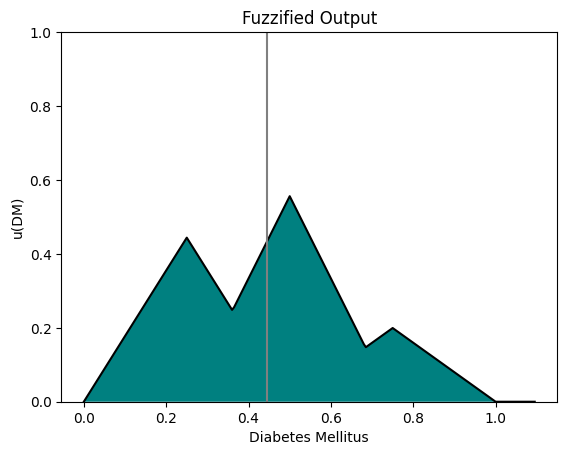

In [8]:
y1=np.fmax(min1,min2)
y2=np.fmax(y1,min3)
y3=np.fmax(y2,min4)
y4=np.fmax(y3,min5)
y5=np.fmax(y4,min6)
y6=np.fmax(y5,min7)
y7=np.fmax(y6,min8)
Y=np.fmax(y7,min9)
fig,output=plt.subplots()
output.plot(DIAB,Y,color='black')
output.set_title("Fuzzified Output")
output.set_xlabel("Diabetes Mellitus")
output.set_ylabel("u(DM)")
output.set_ylim(0,1)
output.fill(DIAB,Y,'teal')
result=fuzz.defuzz(DIAB,Y,'centroid')
output.axvline(result,color='grey')

In [9]:
print(f"Patient has {round(result*100,3)}% likelihood of having Diabetes Mellitus.")
if result<0.4:
  print("Patient classified as Non-Diabetic.")
if 0.4<=result<0.60:
  print("Patient classified as Pre-Diabetic.")
else:
  print("Patient classified as Diabetic.")

Patient has 44.442% likelihood of having Diabetes Mellitus.
Patient classified as Pre-Diabetic.
